In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  2  3  4  5  

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

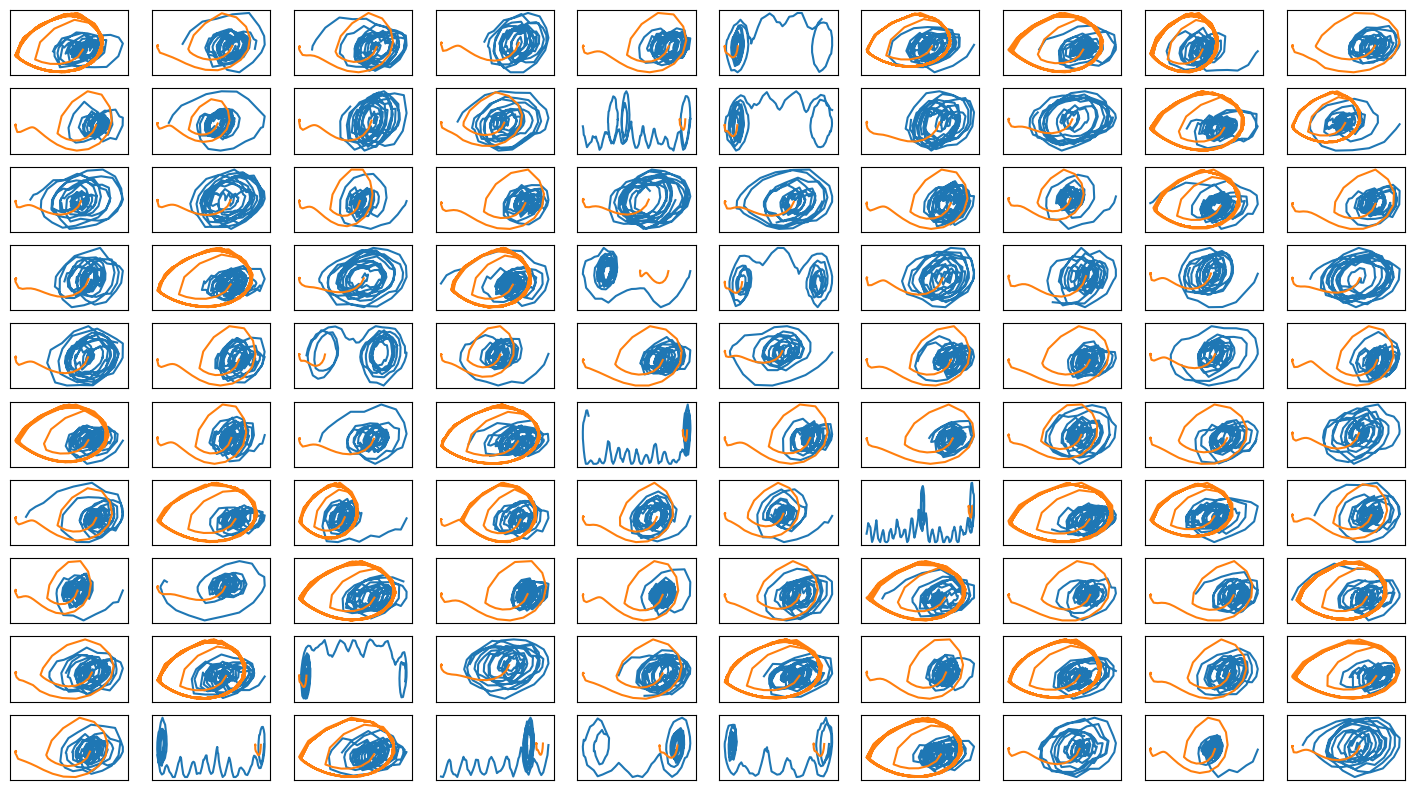

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 560.91184  validloss 682.20478±0.00000  bestvalidloss 682.20478  last_update 0
train: iter 1  trainloss 455.71217  validloss 485.74373±0.00000  bestvalidloss 485.74373  last_update 0
train: iter 2  trainloss 948.25869  validloss 411.05332±0.00000  bestvalidloss 411.05332  last_update 0
train: iter 3  trainloss 368.50353  validloss 381.31292±0.00000  bestvalidloss 381.31292  last_update 0
train: iter 4  trainloss 343.62445  validloss 362.36136±0.00000  bestvalidloss 362.36136  last_update 0
train: iter 5  trainloss 317.71767  validloss 342.66994±0.00000  bestvalidloss 342.66994  last_update 0
train: iter 6  trainloss 292.74858  validloss 317.67529±0.00000  bestvalidloss 317.67529  last_update 0
train: iter 7  trainloss 269.20180  validloss 289.91674±0.00000  bestvalidloss 289.91674  last_update 0
train: iter 8  trainloss 197.53320  validloss 252.16818±0.00000  bestvalidloss 252.16818  last_update 0
train: iter 9  trainloss 121.30098  

train: iter 77  trainloss -478.02984  validloss -444.78675±0.00000  bestvalidloss -468.82771  last_update 2
train: iter 78  trainloss -430.59935  validloss -431.38723±0.00000  bestvalidloss -468.82771  last_update 3
train: iter 79  trainloss -462.19754  validloss -457.42316±0.00000  bestvalidloss -468.82771  last_update 4
train: iter 80  trainloss -461.12617  validloss -358.96654±0.00000  bestvalidloss -468.82771  last_update 5
train: iter 81  trainloss -520.03330  validloss -462.08664±0.00000  bestvalidloss -468.82771  last_update 6
train: iter 82  trainloss -511.84467  validloss -487.71135±0.00000  bestvalidloss -487.71135  last_update 0
train: iter 83  trainloss -506.51446  validloss -465.22584±0.00000  bestvalidloss -487.71135  last_update 1
train: iter 84  trainloss -515.81761  validloss -447.40625±0.00000  bestvalidloss -487.71135  last_update 2
train: iter 85  trainloss -522.10130  validloss -477.84933±0.00000  bestvalidloss -487.71135  last_update 3
train: iter 86  trainloss -5

train: iter 154  trainloss -550.41585  validloss -468.70622±0.00000  bestvalidloss -597.91708  last_update 7
train: iter 155  trainloss -602.45945  validloss -558.91947±0.00000  bestvalidloss -597.91708  last_update 8
train: iter 156  trainloss -594.97109  validloss -476.76540±0.00000  bestvalidloss -597.91708  last_update 9
train: iter 157  trainloss -621.60200  validloss -577.06393±0.00000  bestvalidloss -597.91708  last_update 10
train: iter 158  trainloss -604.42342  validloss -578.19725±0.00000  bestvalidloss -597.91708  last_update 11
train: iter 159  trainloss -608.55135  validloss -573.04242±0.00000  bestvalidloss -597.91708  last_update 12
train: iter 160  trainloss -621.72052  validloss -576.40021±0.00000  bestvalidloss -597.91708  last_update 13
train: iter 161  trainloss -624.32353  validloss -584.41076±0.00000  bestvalidloss -597.91708  last_update 14
train: iter 162  trainloss -628.12813  validloss -566.12028±0.00000  bestvalidloss -597.91708  last_update 15
train: iter 1

train: iter 229  trainloss -639.27306  validloss -596.91439±0.00000  bestvalidloss -646.98527  last_update 3
train: iter 230  trainloss -663.04752  validloss -621.42269±0.00000  bestvalidloss -646.98527  last_update 4
train: iter 231  trainloss -671.12060  validloss -623.43449±0.00000  bestvalidloss -646.98527  last_update 5
train: iter 232  trainloss -669.99462  validloss -639.76479±0.00000  bestvalidloss -646.98527  last_update 6
train: iter 233  trainloss -677.80749  validloss -641.62732±0.00000  bestvalidloss -646.98527  last_update 7
train: iter 234  trainloss -679.06450  validloss -632.64317±0.00000  bestvalidloss -646.98527  last_update 8
train: iter 235  trainloss -681.82960  validloss -636.98757±0.00000  bestvalidloss -646.98527  last_update 9
train: iter 236  trainloss -679.25362  validloss -647.22589±0.00000  bestvalidloss -647.22589  last_update 0
train: iter 237  trainloss -636.67912  validloss -627.16320±0.00000  bestvalidloss -647.22589  last_update 1
train: iter 238  tr

train: iter 305  trainloss -722.49602  validloss -672.88859±0.00000  bestvalidloss -677.82441  last_update 3
train: iter 306  trainloss -695.69832  validloss -644.79592±0.00000  bestvalidloss -677.82441  last_update 4
train: iter 307  trainloss -701.14708  validloss -666.96109±0.00000  bestvalidloss -677.82441  last_update 5
train: iter 308  trainloss -615.58903  validloss -674.42238±0.00000  bestvalidloss -677.82441  last_update 6
train: iter 309  trainloss -702.61373  validloss -663.32143±0.00000  bestvalidloss -677.82441  last_update 7
train: iter 310  trainloss -708.42476  validloss -656.69772±0.00000  bestvalidloss -677.82441  last_update 8
train: iter 311  trainloss -686.51114  validloss -671.67703±0.00000  bestvalidloss -677.82441  last_update 9
train: iter 312  trainloss -691.61407  validloss -643.45214±0.00000  bestvalidloss -677.82441  last_update 10
train: iter 313  trainloss -647.38237  validloss -660.41292±0.00000  bestvalidloss -677.82441  last_update 11
train: iter 314  

train: iter 380  trainloss -701.55758  validloss -654.52777±0.00000  bestvalidloss -693.36850  last_update 14
train: iter 381  trainloss -719.04089  validloss -669.32770±0.00000  bestvalidloss -693.36850  last_update 15
train: iter 382  trainloss -728.74449  validloss -673.98142±0.00000  bestvalidloss -693.36850  last_update 16
train: iter 383  trainloss -708.09630  validloss -644.17334±0.00000  bestvalidloss -693.36850  last_update 17
train: iter 384  trainloss -732.45557  validloss -683.47698±0.00000  bestvalidloss -693.36850  last_update 18
train: iter 385  trainloss -725.06888  validloss -695.26348±0.00000  bestvalidloss -695.26348  last_update 0
train: iter 386  trainloss -723.79191  validloss -665.61956±0.00000  bestvalidloss -695.26348  last_update 1
train: iter 387  trainloss -737.96265  validloss -692.69115±0.00000  bestvalidloss -695.26348  last_update 2
train: iter 388  trainloss -678.79884  validloss -622.60636±0.00000  bestvalidloss -695.26348  last_update 3
train: iter 38

train: iter 455  trainloss -731.63637  validloss -680.71223±0.00000  bestvalidloss -705.34118  last_update 26
train: iter 456  trainloss -733.69321  validloss -691.53243±0.00000  bestvalidloss -705.34118  last_update 27
train: iter 457  trainloss -737.46401  validloss -702.15682±0.00000  bestvalidloss -705.34118  last_update 28
train: iter 458  trainloss -716.68933  validloss -697.05817±0.00000  bestvalidloss -705.34118  last_update 29
train: iter 459  trainloss -722.03563  validloss -699.89233±0.00000  bestvalidloss -705.34118  last_update 30
train: iter 460  trainloss -728.29694  validloss -663.65484±0.00000  bestvalidloss -705.34118  last_update 31
train: iter 461  trainloss -729.19141  validloss -671.10646±0.00000  bestvalidloss -705.34118  last_update 32
train: iter 462  trainloss -741.10274  validloss -693.11331±0.00000  bestvalidloss -705.34118  last_update 33
train: iter 463  trainloss -716.70754  validloss -698.67363±0.00000  bestvalidloss -705.34118  last_update 34
train: ite

train: iter 530  trainloss -738.86847  validloss -703.22181±0.00000  bestvalidloss -709.36594  last_update 11
train: iter 531  trainloss -735.87314  validloss -690.03080±0.00000  bestvalidloss -709.36594  last_update 12
train: iter 532  trainloss -745.73237  validloss -708.01306±0.00000  bestvalidloss -709.36594  last_update 13
train: iter 533  trainloss -748.54091  validloss -709.43199±0.00000  bestvalidloss -709.43199  last_update 0
train: iter 534  trainloss -746.71761  validloss -704.79028±0.00000  bestvalidloss -709.43199  last_update 1
train: iter 535  trainloss -754.32543  validloss -709.04642±0.00000  bestvalidloss -709.43199  last_update 2
train: iter 536  trainloss -727.64954  validloss -713.16344±0.00000  bestvalidloss -713.16344  last_update 0
train: iter 537  trainloss -743.38212  validloss -683.14494±0.00000  bestvalidloss -713.16344  last_update 1
train: iter 538  trainloss -749.12990  validloss -690.63709±0.00000  bestvalidloss -713.16344  last_update 2
train: iter 539 

train: iter 607  trainloss -743.28230  validloss -689.26286±0.00000  bestvalidloss -718.17898  last_update 25
train: iter 608  trainloss -738.90285  validloss -677.20755±0.00000  bestvalidloss -718.17898  last_update 26
train: iter 609  trainloss -757.23361  validloss -695.16492±0.00000  bestvalidloss -718.17898  last_update 27
train: iter 610  trainloss -754.11418  validloss -691.14283±0.00000  bestvalidloss -718.17898  last_update 28
train: iter 611  trainloss -712.15611  validloss -690.89182±0.00000  bestvalidloss -718.17898  last_update 29
train: iter 612  trainloss -717.65642  validloss -672.93349±0.00000  bestvalidloss -718.17898  last_update 30
train: iter 613  trainloss -737.68028  validloss -633.14024±0.00000  bestvalidloss -718.17898  last_update 31
train: iter 614  trainloss -742.40797  validloss -695.69937±0.00000  bestvalidloss -718.17898  last_update 32
train: iter 615  trainloss -748.21836  validloss -685.15180±0.00000  bestvalidloss -718.17898  last_update 33
train: ite

train: iter 683  trainloss -726.21414  validloss -681.40476±0.00000  bestvalidloss -720.52404  last_update 55
train: iter 684  trainloss -751.62090  validloss -699.06129±0.00000  bestvalidloss -720.52404  last_update 56
train: iter 685  trainloss -753.62675  validloss -699.40445±0.00000  bestvalidloss -720.52404  last_update 57
train: iter 686  trainloss -756.30455  validloss -669.36759±0.00000  bestvalidloss -720.52404  last_update 58
train: iter 687  trainloss -750.33199  validloss -698.17228±0.00000  bestvalidloss -720.52404  last_update 59
train: iter 688  trainloss -748.89698  validloss -695.85899±0.00000  bestvalidloss -720.52404  last_update 60
train: iter 689  trainloss -761.83777  validloss -705.95103±0.00000  bestvalidloss -720.52404  last_update 61
train: iter 690  trainloss -751.09456  validloss -699.36005±0.00000  bestvalidloss -720.52404  last_update 62
train: iter 691  trainloss -761.67612  validloss -709.55233±0.00000  bestvalidloss -720.52404  last_update 63
train: ite

train: iter 758  trainloss -765.97950  validloss -713.29730±0.00000  bestvalidloss -724.01258  last_update 2
train: iter 759  trainloss -761.65000  validloss -709.26237±0.00000  bestvalidloss -724.01258  last_update 3
train: iter 760  trainloss -762.13227  validloss -713.39994±0.00000  bestvalidloss -724.01258  last_update 4
train: iter 761  trainloss -733.20031  validloss -675.31925±0.00000  bestvalidloss -724.01258  last_update 5
train: iter 762  trainloss -756.36962  validloss -694.57029±0.00000  bestvalidloss -724.01258  last_update 6
train: iter 763  trainloss -759.49991  validloss -706.87658±0.00000  bestvalidloss -724.01258  last_update 7
train: iter 764  trainloss -727.32091  validloss -534.97497±0.00000  bestvalidloss -724.01258  last_update 8
train: iter 765  trainloss -760.24120  validloss -710.06957±0.00000  bestvalidloss -724.01258  last_update 9
train: iter 766  trainloss -761.26993  validloss -721.94242±0.00000  bestvalidloss -724.01258  last_update 10
train: iter 767  t

train: iter 835  trainloss -768.73071  validloss -715.46476±0.00000  bestvalidloss -725.47663  last_update 26
train: iter 836  trainloss -722.32166  validloss -602.87984±0.00000  bestvalidloss -725.47663  last_update 27
train: iter 837  trainloss -752.92425  validloss -700.84336±0.00000  bestvalidloss -725.47663  last_update 28
train: iter 838  trainloss -752.37443  validloss -699.55065±0.00000  bestvalidloss -725.47663  last_update 29
train: iter 839  trainloss -757.78542  validloss -695.66376±0.00000  bestvalidloss -725.47663  last_update 30
train: iter 840  trainloss -766.62745  validloss -716.05277±0.00000  bestvalidloss -725.47663  last_update 31
train: iter 841  trainloss -770.50882  validloss -709.41817±0.00000  bestvalidloss -725.47663  last_update 32
train: iter 842  trainloss -758.15281  validloss -722.96822±0.00000  bestvalidloss -725.47663  last_update 33
train: iter 843  trainloss -766.89606  validloss -716.51872±0.00000  bestvalidloss -725.47663  last_update 34
train: ite

train: iter 910  trainloss -759.33372  validloss -721.62520±0.00000  bestvalidloss -730.25451  last_update 43
train: iter 911  trainloss -780.44844  validloss -726.73496±0.00000  bestvalidloss -730.25451  last_update 44
train: iter 912  trainloss -771.20381  validloss -720.43832±0.00000  bestvalidloss -730.25451  last_update 45
train: iter 913  trainloss -764.98958  validloss -727.91011±0.00000  bestvalidloss -730.25451  last_update 46
train: iter 914  trainloss -775.75718  validloss -711.70119±0.00000  bestvalidloss -730.25451  last_update 47
train: iter 915  trainloss -783.18676  validloss -714.16242±0.00000  bestvalidloss -730.25451  last_update 48
train: iter 916  trainloss -773.52997  validloss -692.65720±0.00000  bestvalidloss -730.25451  last_update 49
train: iter 917  trainloss -766.26708  validloss -651.06017±0.00000  bestvalidloss -730.25451  last_update 50
train: iter 918  trainloss -776.83917  validloss -697.56103±0.00000  bestvalidloss -730.25451  last_update 51
train: ite

train: iter 986  trainloss -785.42704  validloss -715.58804±0.00000  bestvalidloss -730.51121  last_update 2
train: iter 987  trainloss -775.75866  validloss -729.91434±0.00000  bestvalidloss -730.51121  last_update 3
train: iter 988  trainloss -759.51421  validloss -688.23179±0.00000  bestvalidloss -730.51121  last_update 4
train: iter 989  trainloss -764.74375  validloss -718.77216±0.00000  bestvalidloss -730.51121  last_update 5
train: iter 990  trainloss -783.06978  validloss -696.55770±0.00000  bestvalidloss -730.51121  last_update 6
train: iter 991  trainloss -788.93042  validloss -732.07076±0.00000  bestvalidloss -732.07076  last_update 0
train: iter 992  trainloss -785.24195  validloss -732.87408±0.00000  bestvalidloss -732.87408  last_update 0
train: iter 993  trainloss -778.87451  validloss -725.54461±0.00000  bestvalidloss -732.87408  last_update 1
train: iter 994  trainloss -764.22958  validloss -695.86201±0.00000  bestvalidloss -732.87408  last_update 2
train: iter 995  tr

train: iter 1062  trainloss -785.76862  validloss -715.19248±0.00000  bestvalidloss -734.32428  last_update 33
train: iter 1063  trainloss -775.50540  validloss -738.03187±0.00000  bestvalidloss -738.03187  last_update 0
train: iter 1064  trainloss -779.70930  validloss -698.07187±0.00000  bestvalidloss -738.03187  last_update 1
train: iter 1065  trainloss -769.39122  validloss -725.97434±0.00000  bestvalidloss -738.03187  last_update 2
train: iter 1066  trainloss -781.39569  validloss -743.78175±0.00000  bestvalidloss -743.78175  last_update 0
train: iter 1067  trainloss -776.99451  validloss -739.37797±0.00000  bestvalidloss -743.78175  last_update 1
train: iter 1068  trainloss -773.14077  validloss -737.86060±0.00000  bestvalidloss -743.78175  last_update 2
train: iter 1069  trainloss -781.02335  validloss -736.36931±0.00000  bestvalidloss -743.78175  last_update 3
train: iter 1070  trainloss -794.51931  validloss -742.19583±0.00000  bestvalidloss -743.78175  last_update 4
train: it

train: iter 1137  trainloss -794.27956  validloss -739.41497±0.00000  bestvalidloss -750.11055  last_update 15
train: iter 1138  trainloss -786.77684  validloss -748.07233±0.00000  bestvalidloss -750.11055  last_update 16
train: iter 1139  trainloss -787.08122  validloss -735.94643±0.00000  bestvalidloss -750.11055  last_update 17
train: iter 1140  trainloss -765.13607  validloss -743.68425±0.00000  bestvalidloss -750.11055  last_update 18
train: iter 1141  trainloss -770.44874  validloss -735.72801±0.00000  bestvalidloss -750.11055  last_update 19
train: iter 1142  trainloss -779.00660  validloss -715.41900±0.00000  bestvalidloss -750.11055  last_update 20
train: iter 1143  trainloss -785.33621  validloss -733.19568±0.00000  bestvalidloss -750.11055  last_update 21
train: iter 1144  trainloss -789.16703  validloss -743.84427±0.00000  bestvalidloss -750.11055  last_update 22
train: iter 1145  trainloss -790.99741  validloss -744.82911±0.00000  bestvalidloss -750.11055  last_update 23
t

train: iter 1213  trainloss -785.87217  validloss -736.37232±0.00000  bestvalidloss -760.06220  last_update 55
train: iter 1214  trainloss -788.96962  validloss -735.96134±0.00000  bestvalidloss -760.06220  last_update 56
train: iter 1215  trainloss -779.11289  validloss -739.76128±0.00000  bestvalidloss -760.06220  last_update 57
train: iter 1216  trainloss -789.20939  validloss -738.31257±0.00000  bestvalidloss -760.06220  last_update 58
train: iter 1217  trainloss -785.38317  validloss -669.18281±0.00000  bestvalidloss -760.06220  last_update 59
train: iter 1218  trainloss -794.30329  validloss -742.34831±0.00000  bestvalidloss -760.06220  last_update 60
train: iter 1219  trainloss -772.70825  validloss -747.68548±0.00000  bestvalidloss -760.06220  last_update 61
train: iter 1220  trainloss -782.12896  validloss -692.15890±0.00000  bestvalidloss -760.06220  last_update 62
train: iter 1221  trainloss -786.14070  validloss -728.47810±0.00000  bestvalidloss -760.06220  last_update 63
t

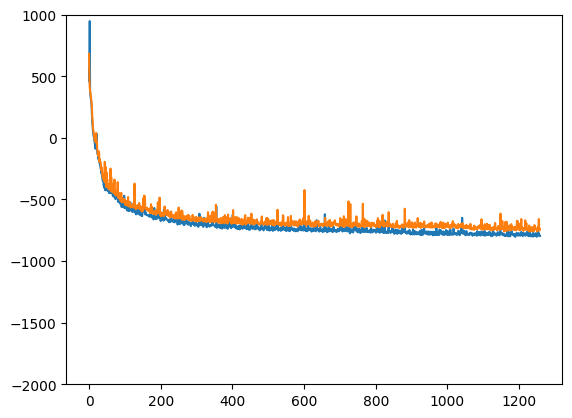

train_weighted_vae: enc
train: iter 0  trainloss -796.65700  validloss -758.87799±0.00000  bestvalidloss -758.87799  last_update 0
train: iter 1  trainloss -798.44015  validloss -751.09717±0.00000  bestvalidloss -758.87799  last_update 1
train: iter 2  trainloss -799.73179  validloss -757.56565±0.00000  bestvalidloss -758.87799  last_update 2
train: iter 3  trainloss -800.61461  validloss -760.06478±0.00000  bestvalidloss -760.06478  last_update 0
train: iter 4  trainloss -799.92607  validloss -761.47916±0.00000  bestvalidloss -761.47916  last_update 0
train: iter 5  trainloss -798.52626  validloss -753.81658±0.00000  bestvalidloss -761.47916  last_update 1
train: iter 6  trainloss -802.77201  validloss -759.27349±0.00000  bestvalidloss -761.47916  last_update 2
train: iter 7  trainloss -803.73032  validloss -759.37966±0.00000  bestvalidloss -761.47916  last_update 3
train: iter 8  trainloss -802.87544  validloss -756.71227±0.00000  bestvalidloss -761.47916  last_update 4
train: iter 9

train: iter 78  trainloss -803.74111  validloss -755.26251±0.00000  bestvalidloss -761.47916  last_update 74
train: iter 79  trainloss -799.77436  validloss -749.30307±0.00000  bestvalidloss -761.47916  last_update 75
train: iter 80  trainloss -800.68409  validloss -759.50128±0.00000  bestvalidloss -761.47916  last_update 76
train: iter 81  trainloss -801.09346  validloss -749.89371±0.00000  bestvalidloss -761.47916  last_update 77
train: iter 82  trainloss -802.65851  validloss -751.56998±0.00000  bestvalidloss -761.47916  last_update 78
train: iter 83  trainloss -803.31195  validloss -754.88155±0.00000  bestvalidloss -761.47916  last_update 79
train: iter 84  trainloss -803.64445  validloss -753.46768±0.00000  bestvalidloss -761.47916  last_update 80
train: iter 85  trainloss -799.88601  validloss -755.50633±0.00000  bestvalidloss -761.47916  last_update 81
train: iter 86  trainloss -800.10579  validloss -748.40114±0.00000  bestvalidloss -761.47916  last_update 82
train: iter 87  tra

train: iter 48  trainloss -777.10433  validloss -703.52959±0.00000  bestvalidloss -762.63021  last_update 2
train: iter 49  trainloss -783.89310  validloss -725.69207±0.00000  bestvalidloss -762.63021  last_update 3
train: iter 50  trainloss -791.97959  validloss -722.46059±0.00000  bestvalidloss -762.63021  last_update 4
train: iter 51  trainloss -796.57197  validloss -754.13358±0.00000  bestvalidloss -762.63021  last_update 5
train: iter 52  trainloss -794.09279  validloss -757.91477±0.00000  bestvalidloss -762.63021  last_update 6
train: iter 53  trainloss -775.02499  validloss -715.33065±0.00000  bestvalidloss -762.63021  last_update 7
train: iter 54  trainloss -790.14288  validloss -753.62749±0.00000  bestvalidloss -762.63021  last_update 8
train: iter 55  trainloss -789.92206  validloss -753.00767±0.00000  bestvalidloss -762.63021  last_update 9
train: iter 56  trainloss -794.71681  validloss -755.79175±0.00000  bestvalidloss -762.63021  last_update 10
train: iter 57  trainloss -

train: iter 124  trainloss -796.36236  validloss -737.63311±0.00000  bestvalidloss -763.86758  last_update 34
train: iter 125  trainloss -799.19016  validloss -752.31845±0.00000  bestvalidloss -763.86758  last_update 35
train: iter 126  trainloss -798.79176  validloss -759.26978±0.00000  bestvalidloss -763.86758  last_update 36
train: iter 127  trainloss -805.45129  validloss -740.17886±0.00000  bestvalidloss -763.86758  last_update 37
train: iter 128  trainloss -793.51150  validloss -748.19520±0.00000  bestvalidloss -763.86758  last_update 38
train: iter 129  trainloss -786.20818  validloss -752.92197±0.00000  bestvalidloss -763.86758  last_update 39
train: iter 130  trainloss -799.08218  validloss -752.84085±0.00000  bestvalidloss -763.86758  last_update 40
train: iter 131  trainloss -798.44799  validloss -759.80363±0.00000  bestvalidloss -763.86758  last_update 41
train: iter 132  trainloss -799.15004  validloss -763.68555±0.00000  bestvalidloss -763.86758  last_update 42
train: ite

train: iter 200  trainloss -791.91753  validloss -745.58687±0.00000  bestvalidloss -767.88179  last_update 25
train: iter 201  trainloss -802.44735  validloss -759.28193±0.00000  bestvalidloss -767.88179  last_update 26
train: iter 202  trainloss -790.22066  validloss -761.21061±0.00000  bestvalidloss -767.88179  last_update 27
train: iter 203  trainloss -805.76924  validloss -753.25590±0.00000  bestvalidloss -767.88179  last_update 28
train: iter 204  trainloss -794.02502  validloss -742.62089±0.00000  bestvalidloss -767.88179  last_update 29
train: iter 205  trainloss -788.99230  validloss -745.92281±0.00000  bestvalidloss -767.88179  last_update 30
train: iter 206  trainloss -798.44093  validloss -752.16370±0.00000  bestvalidloss -767.88179  last_update 31
train: iter 207  trainloss -789.41564  validloss -761.44838±0.00000  bestvalidloss -767.88179  last_update 32
train: iter 208  trainloss -793.56744  validloss -754.23652±0.00000  bestvalidloss -767.88179  last_update 33
train: ite

train: iter 276  trainloss -800.12861  validloss -753.85242±0.00000  bestvalidloss -770.50049  last_update 17
train: iter 277  trainloss -802.69011  validloss -758.89097±0.00000  bestvalidloss -770.50049  last_update 18
train: iter 278  trainloss -781.86639  validloss -754.67576±0.00000  bestvalidloss -770.50049  last_update 19
train: iter 279  trainloss -787.53503  validloss -743.51902±0.00000  bestvalidloss -770.50049  last_update 20
train: iter 280  trainloss -794.22383  validloss -697.38672±0.00000  bestvalidloss -770.50049  last_update 21
train: iter 281  trainloss -797.96090  validloss -752.77976±0.00000  bestvalidloss -770.50049  last_update 22
train: iter 282  trainloss -800.90601  validloss -766.09702±0.00000  bestvalidloss -770.50049  last_update 23
train: iter 283  trainloss -799.42383  validloss -756.49190±0.00000  bestvalidloss -770.50049  last_update 24
train: iter 284  trainloss -752.83709  validloss -617.30555±0.00000  bestvalidloss -770.50049  last_update 25
train: ite

train: iter 354  trainloss -785.75273  validloss -743.94652±0.00000  bestvalidloss -772.16303  last_update 18
train: iter 355  trainloss -787.06374  validloss -755.28204±0.00000  bestvalidloss -772.16303  last_update 19
train: iter 356  trainloss -800.97713  validloss -769.10355±0.00000  bestvalidloss -772.16303  last_update 20
train: iter 357  trainloss -805.16428  validloss -765.37160±0.00000  bestvalidloss -772.16303  last_update 21
train: iter 358  trainloss -794.46445  validloss -771.50586±0.00000  bestvalidloss -772.16303  last_update 22
train: iter 359  trainloss -794.38181  validloss -744.78188±0.00000  bestvalidloss -772.16303  last_update 23
train: iter 360  trainloss -797.63197  validloss -747.63728±0.00000  bestvalidloss -772.16303  last_update 24
train: iter 361  trainloss -800.50519  validloss -760.40385±0.00000  bestvalidloss -772.16303  last_update 25
train: iter 362  trainloss -800.71929  validloss -759.95374±0.00000  bestvalidloss -772.16303  last_update 26
train: ite

train: iter 432  trainloss -792.51996  validloss -764.60775±0.00000  bestvalidloss -773.60311  last_update 35
train: iter 433  trainloss -803.74182  validloss -768.77291±0.00000  bestvalidloss -773.60311  last_update 36
train: iter 434  trainloss -798.31343  validloss -757.69225±0.00000  bestvalidloss -773.60311  last_update 37
train: iter 435  trainloss -800.95301  validloss -757.32761±0.00000  bestvalidloss -773.60311  last_update 38
train: iter 436  trainloss -791.13668  validloss -769.22535±0.00000  bestvalidloss -773.60311  last_update 39
train: iter 437  trainloss -800.30385  validloss -753.10509±0.00000  bestvalidloss -773.60311  last_update 40
train: iter 438  trainloss -801.67465  validloss -762.59085±0.00000  bestvalidloss -773.60311  last_update 41
train: iter 439  trainloss -804.64019  validloss -769.13005±0.00000  bestvalidloss -773.60311  last_update 42
train: iter 440  trainloss -790.06672  validloss -771.56170±0.00000  bestvalidloss -773.60311  last_update 43
train: ite

train: iter 508  trainloss -801.01202  validloss -768.94555±0.00000  bestvalidloss -776.27999  last_update 49
train: iter 509  trainloss -796.37481  validloss -759.06135±0.00000  bestvalidloss -776.27999  last_update 50
train: iter 510  trainloss -802.74475  validloss -743.19694±0.00000  bestvalidloss -776.27999  last_update 51
train: iter 511  trainloss -804.40988  validloss -760.16674±0.00000  bestvalidloss -776.27999  last_update 52
train: iter 512  trainloss -783.79899  validloss -756.27805±0.00000  bestvalidloss -776.27999  last_update 53
train: iter 513  trainloss -795.75859  validloss -748.63499±0.00000  bestvalidloss -776.27999  last_update 54
train: iter 514  trainloss -801.61834  validloss -747.53219±0.00000  bestvalidloss -776.27999  last_update 55
train: iter 515  trainloss -802.89035  validloss -759.04957±0.00000  bestvalidloss -776.27999  last_update 56
train: iter 516  trainloss -800.02490  validloss -754.37453±0.00000  bestvalidloss -776.27999  last_update 57
train: ite

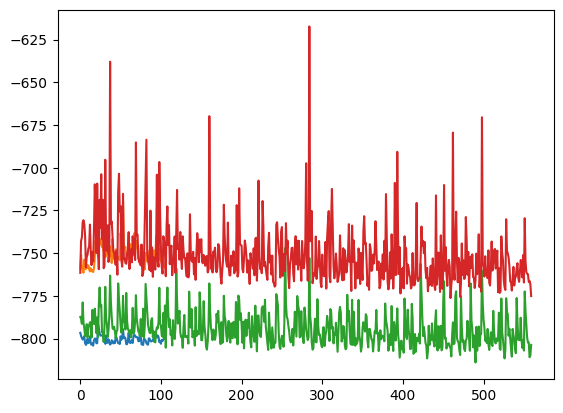

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()


In [10]:
vi.load()
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

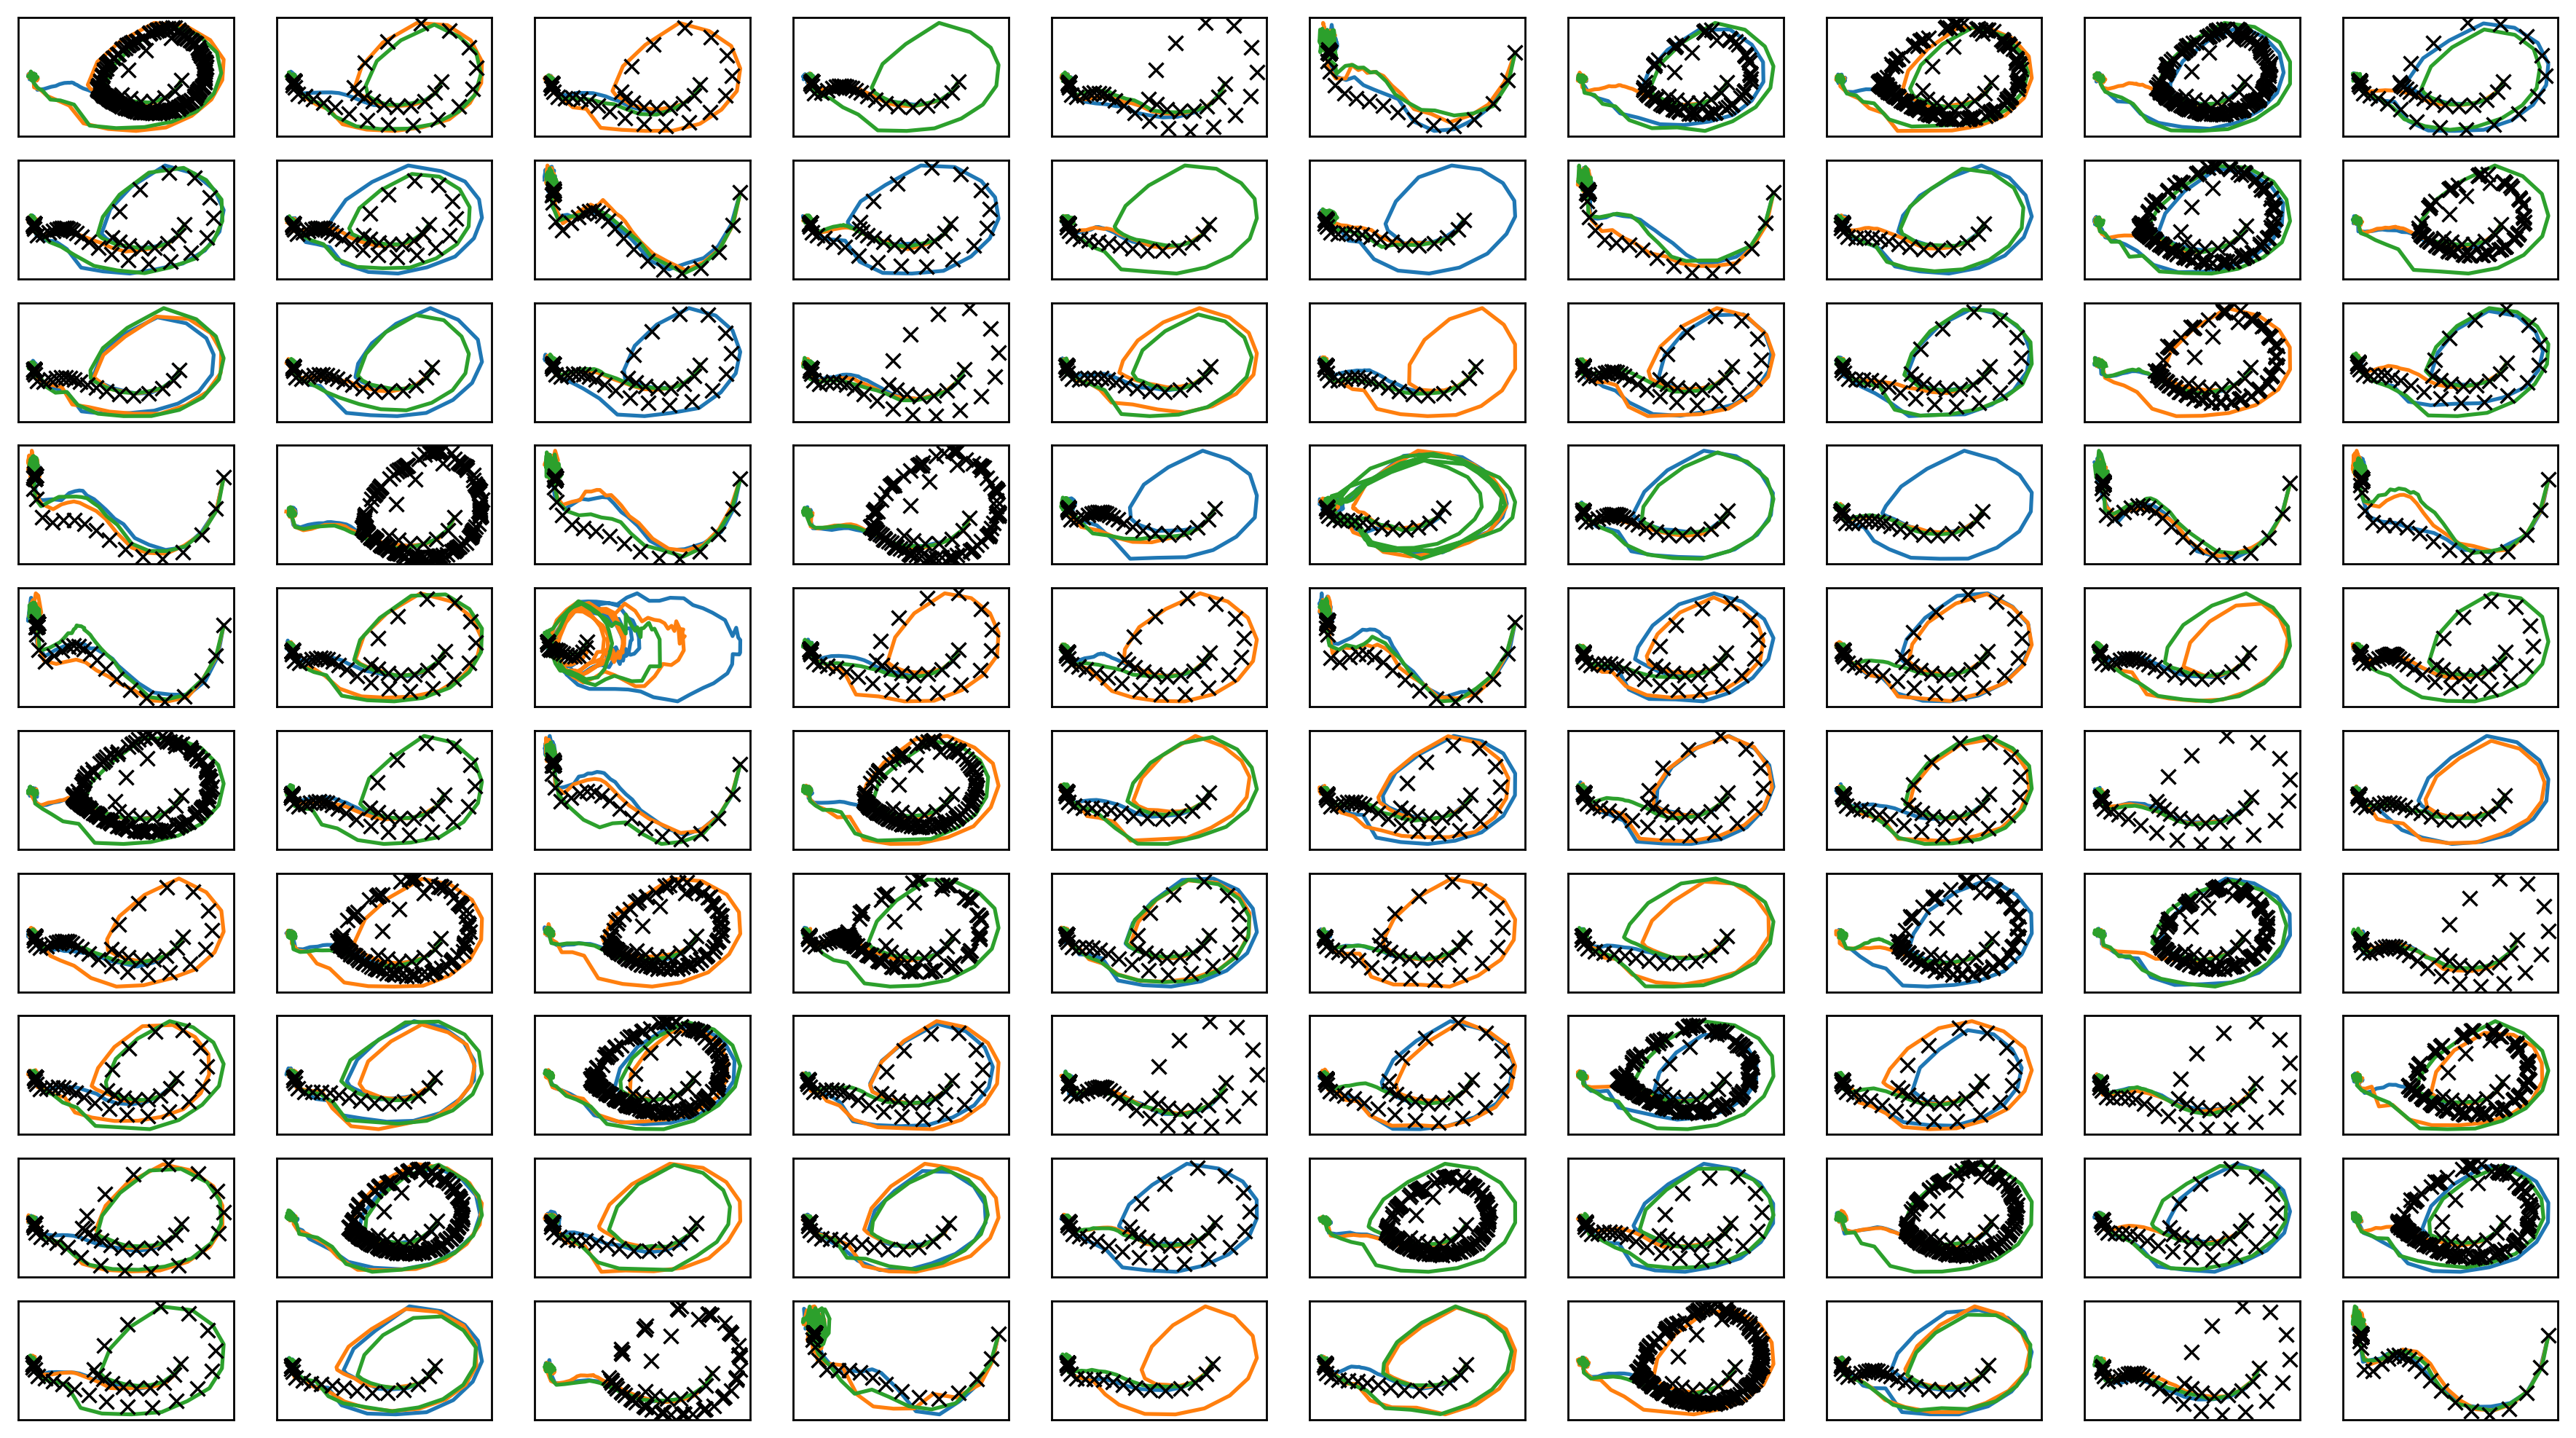

In [11]:
vi.get_sim_rollout_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

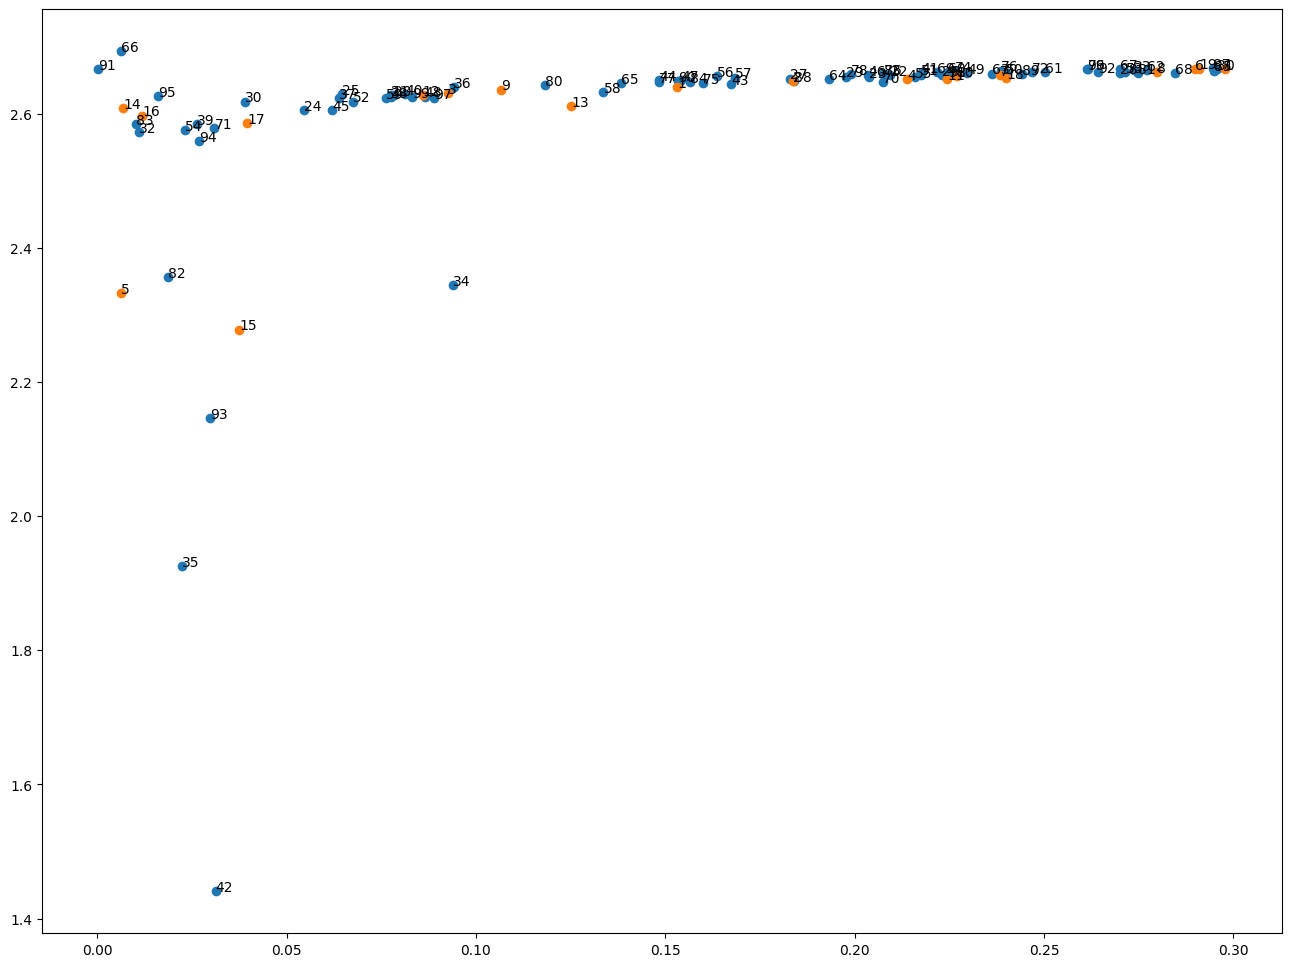

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_list_for_mixture_of_gaussian_belief)):
    np_mulogvar.append(vi.mulogvar_list_for_mixture_of_gaussian_belief[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


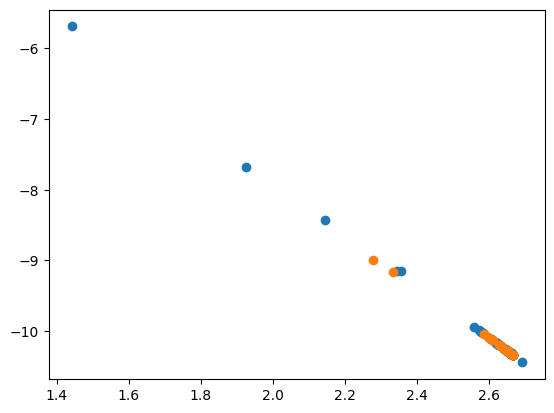

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-20 00:45:31.066022


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 4.12208  validloss 4.31880±0.00000  bestvalidloss 4.31880  last_update 0
train: iter 1  trainloss 3.75593  validloss 3.91840±0.00000  bestvalidloss 3.91840  last_update 0
train: iter 2  trainloss 3.45910  validloss 3.59712±0.00000  bestvalidloss 3.59712  last_update 0
train: iter 3  trainloss 3.21132  validloss 3.32081±0.00000  bestvalidloss 3.32081  last_update 0
train: iter 4  trainloss 3.00450  validloss 3.08756±0.00000  bestvalidloss 3.08756  last_update 0
train: iter 5  trainloss 2.82685  validloss 2.90256±0.00000  bestvalidloss 2.90256  last_update 0
train: iter 6  trainloss 2.67959  validloss 2.74411±0.00000  bestvalidloss 2.74411  last_update 0
train: iter 7  trainloss 2.55427  validloss 2.60561±0.00000  bestvalidloss 2.60561  last_update 0
train: iter 8  trainloss 2.44408  validloss 2.49020±0.00000  bestvalidloss 2.49020  last_update 0
train: iter 9  trainloss 2.34830  validloss 2.38821±0.00000  bestvalidloss 2.38821  last_update 0
train: iter 10  trai

train: iter 91  trainloss -0.25807  validloss -0.39577±0.00000  bestvalidloss -0.39577  last_update 0
train: iter 92  trainloss -0.25311  validloss -0.40258±0.00000  bestvalidloss -0.40258  last_update 0
train: iter 93  trainloss -0.26204  validloss -0.41169±0.00000  bestvalidloss -0.41169  last_update 0
train: iter 94  trainloss -0.24820  validloss -0.42010±0.00000  bestvalidloss -0.42010  last_update 0
train: iter 95  trainloss -0.23271  validloss -0.42693±0.00000  bestvalidloss -0.42693  last_update 0
train: iter 96  trainloss -0.26867  validloss -0.42600±0.00000  bestvalidloss -0.42693  last_update 1
train: iter 97  trainloss -0.26095  validloss -0.43299±0.00000  bestvalidloss -0.43299  last_update 0
train: iter 98  trainloss -0.27495  validloss -0.44337±0.00000  bestvalidloss -0.44337  last_update 0
train: iter 99  trainloss -0.26322  validloss -0.45127±0.00000  bestvalidloss -0.45127  last_update 0
train: iter 100  trainloss -0.27639  validloss -0.45314±0.00000  bestvalidloss -0.

train: iter 175  trainloss -0.30530  validloss -0.62067±0.00000  bestvalidloss -0.62522  last_update 5
train: iter 176  trainloss -0.37327  validloss -0.61396±0.00000  bestvalidloss -0.62522  last_update 6
train: iter 177  trainloss -0.30789  validloss -0.62437±0.00000  bestvalidloss -0.62522  last_update 7
train: iter 178  trainloss -0.35739  validloss -0.62389±0.00000  bestvalidloss -0.62522  last_update 8
train: iter 179  trainloss -0.32784  validloss -0.62914±0.00000  bestvalidloss -0.62914  last_update 0
train: iter 180  trainloss -0.34251  validloss -0.62838±0.00000  bestvalidloss -0.62914  last_update 1
train: iter 181  trainloss -0.37399  validloss -0.63500±0.00000  bestvalidloss -0.63500  last_update 0
train: iter 182  trainloss -0.27974  validloss -0.62130±0.00000  bestvalidloss -0.63500  last_update 1
train: iter 183  trainloss -0.35276  validloss -0.62046±0.00000  bestvalidloss -0.63500  last_update 2
train: iter 184  trainloss -0.34674  validloss -0.62935±0.00000  bestvali

train: iter 261  trainloss -0.38143  validloss -0.65555±0.00000  bestvalidloss -0.66421  last_update 17
train: iter 262  trainloss -0.31846  validloss -0.65592±0.00000  bestvalidloss -0.66421  last_update 18
train: iter 263  trainloss -0.28978  validloss -0.64659±0.00000  bestvalidloss -0.66421  last_update 19
train: iter 264  trainloss -0.35207  validloss -0.65416±0.00000  bestvalidloss -0.66421  last_update 20
train: iter 265  trainloss -0.34907  validloss -0.66452±0.00000  bestvalidloss -0.66452  last_update 0
train: iter 266  trainloss -0.36115  validloss -0.65861±0.00000  bestvalidloss -0.66452  last_update 1
train: iter 267  trainloss -0.35544  validloss -0.65901±0.00000  bestvalidloss -0.66452  last_update 2
train: iter 268  trainloss -0.36375  validloss -0.65578±0.00000  bestvalidloss -0.66452  last_update 3
train: iter 269  trainloss -0.25780  validloss -0.66812±0.00000  bestvalidloss -0.66812  last_update 0
train: iter 270  trainloss -0.38231  validloss -0.66799±0.00000  best

train: iter 345  trainloss -0.34576  validloss -0.64759±0.00000  bestvalidloss -0.67656  last_update 15
train: iter 346  trainloss -0.32895  validloss -0.65609±0.00000  bestvalidloss -0.67656  last_update 16
train: iter 347  trainloss -0.33963  validloss -0.64592±0.00000  bestvalidloss -0.67656  last_update 17
train: iter 348  trainloss -0.36940  validloss -0.66553±0.00000  bestvalidloss -0.67656  last_update 18
train: iter 349  trainloss -0.36872  validloss -0.66149±0.00000  bestvalidloss -0.67656  last_update 19
train: iter 350  trainloss -0.34280  validloss -0.65217±0.00000  bestvalidloss -0.67656  last_update 20
train: iter 351  trainloss -0.36502  validloss -0.67052±0.00000  bestvalidloss -0.67656  last_update 21
train: iter 352  trainloss -0.39431  validloss -0.66551±0.00000  bestvalidloss -0.67656  last_update 22
train: iter 353  trainloss -0.34764  validloss -0.66739±0.00000  bestvalidloss -0.67656  last_update 23
train: iter 354  trainloss -0.37442  validloss -0.66138±0.00000 

train: iter 429  trainloss -0.34089  validloss -0.66348±0.00000  bestvalidloss -0.68284  last_update 5
train: iter 430  trainloss -0.38807  validloss -0.67377±0.00000  bestvalidloss -0.68284  last_update 6
train: iter 431  trainloss -0.37654  validloss -0.65826±0.00000  bestvalidloss -0.68284  last_update 7
train: iter 432  trainloss -0.36005  validloss -0.65895±0.00000  bestvalidloss -0.68284  last_update 8
train: iter 433  trainloss -0.34157  validloss -0.67566±0.00000  bestvalidloss -0.68284  last_update 9
train: iter 434  trainloss -0.33835  validloss -0.65489±0.00000  bestvalidloss -0.68284  last_update 10
train: iter 435  trainloss -0.29757  validloss -0.64448±0.00000  bestvalidloss -0.68284  last_update 11
train: iter 436  trainloss -0.36472  validloss -0.66657±0.00000  bestvalidloss -0.68284  last_update 12
train: iter 437  trainloss -0.39015  validloss -0.65404±0.00000  bestvalidloss -0.68284  last_update 13
train: iter 438  trainloss -0.32365  validloss -0.66937±0.00000  best

train: iter 513  trainloss -0.31442  validloss -0.67181±0.00000  bestvalidloss -0.68797  last_update 62
train: iter 514  trainloss -0.36681  validloss -0.66111±0.00000  bestvalidloss -0.68797  last_update 63
train: iter 515  trainloss -0.39459  validloss -0.67945±0.00000  bestvalidloss -0.68797  last_update 64
train: iter 516  trainloss -0.32409  validloss -0.66797±0.00000  bestvalidloss -0.68797  last_update 65
train: iter 517  trainloss -0.35991  validloss -0.66204±0.00000  bestvalidloss -0.68797  last_update 66
train: iter 518  trainloss -0.33765  validloss -0.66033±0.00000  bestvalidloss -0.68797  last_update 67
train: iter 519  trainloss -0.36394  validloss -0.67399±0.00000  bestvalidloss -0.68797  last_update 68
train: iter 520  trainloss -0.34909  validloss -0.66329±0.00000  bestvalidloss -0.68797  last_update 69
train: iter 521  trainloss -0.32468  validloss -0.67051±0.00000  bestvalidloss -0.68797  last_update 70
train: iter 522  trainloss -0.33542  validloss -0.66434±0.00000 

In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([ 2.6067, -3.5327], requires_grad=True)


In [17]:
# import torch
# from utils import kdl_var_approx
# x = torch.linspace(np_mulogvar[:,0].min()-0.5,np_mulogvar[:,0].max()+0.5,50)
# y = torch.linspace(np_mulogvar[:,1].min()-0.5,np_mulogvar[:,1].max()+0.5,50)

# data_xyz=[]
# for i in range(len(x)):
#     print(i)
#     for j in range(len(y)):
#         xy=torch.tensor([x[i],y[j]])
#         with torch.no_grad():
#             z = kdl_var_approx(torch.Tensor([x[i],y[j]]), vi.mulogvar_list_for_mixture_of_gaussian_belief)
#         data_xyz.append(torch.Tensor([x[i],y[j],z]))
# data_xyz = torch.vstack(data_xyz)


In [18]:
# # plt.scatter(data_xyz[:,0],data_xyz[:,1],c=data_xyz[:,2])
# # plt.colorbar()
# plt.scatter(data_xyz[:,0],data_xyz[:,1],c=torch.log(data_xyz[:,2]))
# plt.colorbar()
# i = torch.argmin(data_xyz[:,2])
# print(i,data_xyz[i])

In [19]:
print(simdata1[0].shape)

(200, 4)


In [20]:
vi.get_belief()

tensor([ 2.6067, -3.5327])